# Genshin Impact EDA

In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

char_name = []
characters = []

# Retrieving character names
url = 'https://api.genshin.dev/characters/'
response = requests.get(url)
length = len(response.json())
for i in range(length):
    char_name.append(response.json()[i])

# Accessing character infos
for i in range(length):
    response = requests.get(url+char_name[i])
    characters.append(response.json())

df = pd.DataFrame(characters)
df = df.rename(columns={"name": "Name"})

character = 'https://genshin-impact.fandom.com/wiki/Characters'
char_stat = 'https://genshin-impact.fandom.com/wiki/Characters/Comparison#Normal_Attacks'

stat_table = pd.read_html(char_stat)
char_table = pd.read_html(character)
df_stat = stat_table[1]
df_char = char_table[3]

#final table
df_char_info = df_stat.merge(df_char)
df2 = df_char_info.merge(df)
df_temp = df_char_info.loc[(df_char_info['Release Date'] == '2021-08-10')]
df = pd.concat([df2, df_temp], ignore_index=True)

df = df.set_index('Name')
df = df.sort_values(by='Release Date')
df

,Icon,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Rarity,Element,Weapon,...,birthday,description,skillTalents,passiveTalents,constellations,vision_key,weapon_type,title,gender,specialDish
Name,,,,,,,,,,,,,,,,,,,,,
Lisa,NaN,9570,232,573,Elemental Mastery,96,2020-09-28,NaN,Electro,Catalyst,...,0000-06-09,The languid but knowledgeable Librarian of the...,"[{'name': 'Lightning Touch', 'unlock': 'Normal...","[{'name': 'Induced Aftershock', 'unlock': 'Unl...","[{'name': 'Infinite Circuit', 'unlock': 'Const...",ELECTRO,CATALYST,NaN,NaN,NaN
Traveler,NaN,10875,212,683,ATK,24.0%,2020-09-28,NaN,Adaptive,Sword,...,NaN,A traveler from another world who had their on...,"[{'name': 'Foreign Ironwind', 'unlock': 'Norma...","[{'name': 'Slitting Wind', 'unlock': 'Unlocked...","[{'name': 'Raging Vortex', 'unlock': 'Constell...",ANEMO,SWORD,NaN,NaN,NaN
Razor,NaN,11962,234,751,Physical DMG Bonus,30.0%,2020-09-28,NaN,Electro,Claymore,...,0000-09-09,A boy who lives among the wolves in Wolvendom ...,"[{'name': 'Steel Fang', 'unlock': 'Normal Atta...","[{'name': 'Awakening', 'unlock': 'Unlocked at ...","[{'name': 'Wolf's Instinct', 'unlock': 'Conste...",ELECTRO,CLAYMORE,NaN,NaN,NaN
Qiqi,NaN,12368,287,922,Healing Bonus,22.2%,2020-09-28,NaN,Cryo,Sword,...,0000-03-03,An apprentice and herb gatherer at Bubu Pharma...,"[{'name': 'Ancient Sword Art', 'unlock': 'Norm...","[{'name': 'Life-Prolonging Methods', 'unlock':...","[{'name': 'Ascetics of Frost', 'unlock': 'Cons...",CRYO,SWORD,NaN,NaN,NaN
Noelle,NaN,12071,191,799,DEF,30.0%,2020-09-28,NaN,Geo,Claymore,...,0000-03-21,A maid who faithfully serves the Knights of Fa...,"[{'name': 'Favonius Bladework - Maid', 'unlock...","[{'name': 'Devotion', 'unlock': 'Unlocked at A...","[{'name': 'I Got Your Back', 'unlock': 'Conste...",GEO,CLAYMORE,NaN,NaN,NaN
Ningguang,NaN,9787,212,573,Geo DMG Bonus,24.0%,2020-09-28,NaN,Geo,Catalyst,...,0000-08-26,The Tianquan of Liyue Qixing. Her wealth is un...,"[{'name': 'Sparkling Scatter', 'unlock': 'Norm...","[{'name': 'Backup Plan', 'unlock': 'Unlocked a...","[{'name': 'Piercing Fragments', 'unlock': 'Con...",GEO,CATALYST,NaN,NaN,NaN
Mona,NaN,10409,287,653,Energy Recharge,32.0%,2020-09-28,NaN,Hydro,Catalyst,...,0000-08-31,A mysterious young astrologer who proclaims he...,"[{'name': 'Ripple of Fate', 'unlock': 'Normal ...","[{'name': 'Come 'n' Get Me, Hag!', 'unlock': '...","[{'name': 'Prophecy of Submersion', 'unlock': ...",HYDRO,CATALYST,NaN,NaN,NaN
Traveler,NaN,10875,212,683,ATK,24.0%,2020-09-28,NaN,Adaptive,Sword,...,NaN,A traveler from another world who had their on...,"[{'name': 'Foreign Rockblade', 'unlock': 'Norm...","[{'name': 'Shattered Darkrock', 'unlock': 'Unl...","[{'name': 'Invincible Stonewall', 'unlock': 'C...",GEO,SWORD,NaN,NaN,NaN
Keqing,NaN,13103,323,799,CRIT DMG,38.4%,2020-09-28,NaN,Electro,Sword,...,0000-11-20,The Yuheng of the Liyue Qixing. Has much to sa...,"[{'name': 'Yunlai Swordsmanship', 'unlock': 'N...","[{'name': 'Thundering Penance', 'unlock': 'Unl...","[{'name': 'Thundering Might', 'unlock': 'Const...",ELECTRO,SWORD,NaN,NaN,NaN


In [2]:
df = df.drop(
    columns = {'Rarity', 'specialDish', 'gender', 'title', 'description', 'skillTalents', 
               'passiveTalents', 'constellations', 'constellation', 'weapon', 'Icon', 'vision_key', 'weapon_type', 'vision', 'nation', 'affiliation'}, 
    index = {'Traveler'})
df

,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Element,Weapon,Sex,Nation,rarity,birthday
Name,,,,,,,,,,,,
Lisa,9570,232,573,Elemental Mastery,96,2020-09-28,Electro,Catalyst,Female,Mondstadt,4.0,0000-06-09
Razor,11962,234,751,Physical DMG Bonus,30.0%,2020-09-28,Electro,Claymore,Male,Mondstadt,4.0,0000-09-09
Qiqi,12368,287,922,Healing Bonus,22.2%,2020-09-28,Cryo,Sword,Female,Liyue,5.0,0000-03-03
Noelle,12071,191,799,DEF,30.0%,2020-09-28,Geo,Claymore,Female,Mondstadt,4.0,0000-03-21
Ningguang,9787,212,573,Geo DMG Bonus,24.0%,2020-09-28,Geo,Catalyst,Female,Liyue,4.0,0000-08-26
Mona,10409,287,653,Energy Recharge,32.0%,2020-09-28,Hydro,Catalyst,Female,Mondstadt,5.0,0000-08-31
Keqing,13103,323,799,CRIT DMG,38.4%,2020-09-28,Electro,Sword,Female,Liyue,5.0,0000-11-20
Venti,10531,263,669,Energy Recharge,32.0%,2020-09-28,Anemo,Bow,Male,Mondstadt,5.0,0000-06-16
Kaeya,11636,223,792,Energy Recharge,26.7%,2020-09-28,Cryo,Sword,Male,Mondstadt,4.0,0000-11-30


In [3]:
df['rarity']['Sayu'] = 4.0
df['birthday']['Sayu'] = '0000-10-19'
df['rarity']['Yoimiya'] = 5.0
df['birthday']['Yoimiya'] = '0000-06-21'
df

<ipython-input-3-b001552341a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rarity']['Sayu'] = 4.0
<ipython-input-3-b001552341a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birthday']['Sayu'] = '0000-10-19'
<ipython-input-3-b001552341a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rarity']['Yoimiya'] = 5.0
<ipython-input-3-b001552341a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Element,Weapon,Sex,Nation,rarity,birthday
Name,,,,,,,,,,,,
Lisa,9570,232,573,Elemental Mastery,96,2020-09-28,Electro,Catalyst,Female,Mondstadt,4.0,0000-06-09
Razor,11962,234,751,Physical DMG Bonus,30.0%,2020-09-28,Electro,Claymore,Male,Mondstadt,4.0,0000-09-09
Qiqi,12368,287,922,Healing Bonus,22.2%,2020-09-28,Cryo,Sword,Female,Liyue,5.0,0000-03-03
Noelle,12071,191,799,DEF,30.0%,2020-09-28,Geo,Claymore,Female,Mondstadt,4.0,0000-03-21
Ningguang,9787,212,573,Geo DMG Bonus,24.0%,2020-09-28,Geo,Catalyst,Female,Liyue,4.0,0000-08-26
Mona,10409,287,653,Energy Recharge,32.0%,2020-09-28,Hydro,Catalyst,Female,Mondstadt,5.0,0000-08-31
Keqing,13103,323,799,CRIT DMG,38.4%,2020-09-28,Electro,Sword,Female,Liyue,5.0,0000-11-20
Venti,10531,263,669,Energy Recharge,32.0%,2020-09-28,Anemo,Bow,Male,Mondstadt,5.0,0000-06-16
Kaeya,11636,223,792,Energy Recharge,26.7%,2020-09-28,Cryo,Sword,Male,Mondstadt,4.0,0000-11-30


<AxesSubplot:title={'center':'Gender'}>

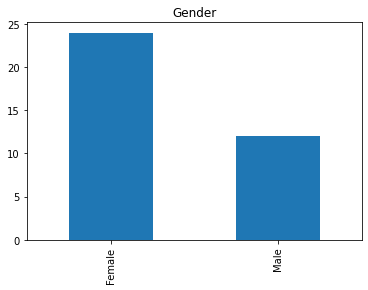

In [7]:
plt.title('Gender')
df['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Element'}>

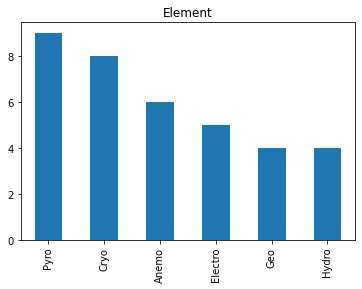

In [8]:
plt.title('Element')
df['Element'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Weapon'}>

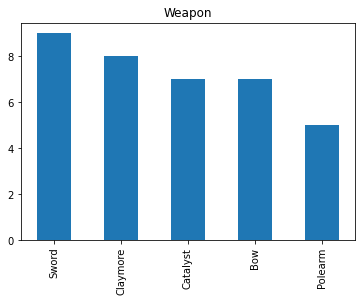

In [9]:
plt.title('Weapon')
df['Weapon'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Gender - Mondstadt'}>

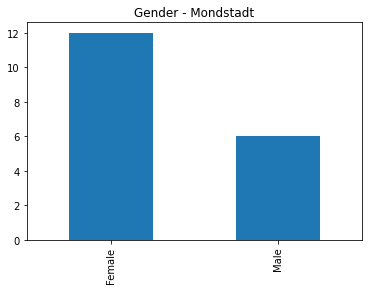

In [4]:
df_mondstadt = df.loc[df['Nation'] == 'Mondstadt']
plt.title('Gender - Mondstadt')
df_mondstadt['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Gender - Liyue'}>

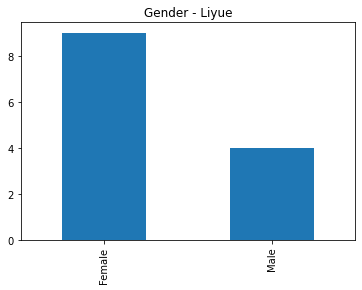

In [5]:
df_liyue = df.loc[df['Nation'] == 'Liyue']
plt.title('Gender - Liyue')
df_liyue['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Gender - Inazuma'}>

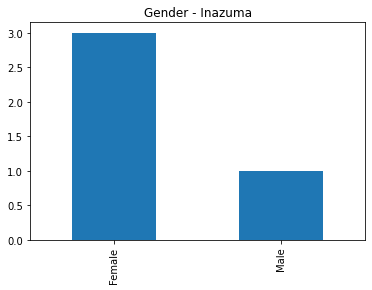

In [6]:
df_inazuma = df.loc[df['Nation'] == 'Inazuma']
plt.title('Gender - Inazuma')
df_inazuma['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Element - Mondstadt'}>

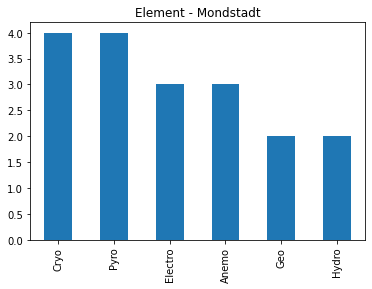

In [10]:
df_mondstadt = df.loc[df['Nation'] == 'Mondstadt']
plt.title('Element - Mondstadt')
df_mondstadt['Element'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Element - Liyue'}>

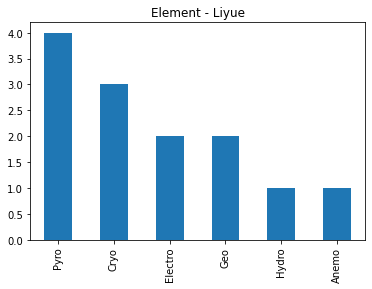

In [11]:
df_liyue = df.loc[df['Nation'] == 'Liyue']
plt.title('Element - Liyue')
df_liyue['Element'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Element - Inazuma'}>

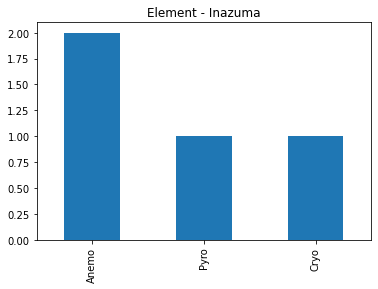

In [12]:
df_inazuma = df.loc[df['Nation'] == 'Inazuma']
plt.title('Element - Inazuma')
df_inazuma['Element'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Weapon - Mondstadt'}>

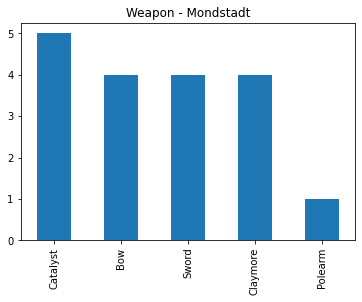

In [13]:
df_mondstadt = df.loc[df['Nation'] == 'Mondstadt']
plt.title('Weapon - Mondstadt')
df_mondstadt['Weapon'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Weapon - Liyue'}>

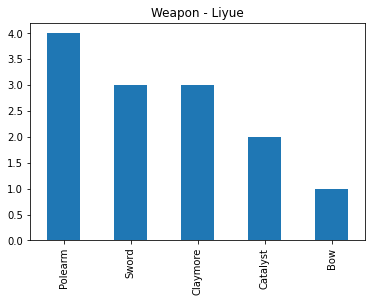

In [14]:
df_liyue = df.loc[df['Nation'] == 'Liyue']
plt.title('Weapon - Liyue')
df_liyue['Weapon'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Weapon - Inazuma'}>

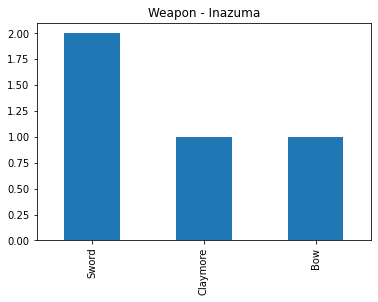

In [15]:
df_inazuma = df.loc[df['Nation'] == 'Inazuma']
plt.title('Weapon - Inazuma')
df_inazuma['Weapon'].value_counts().plot(kind='bar')

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor

import datetime as dt

label_encoder = LabelEncoder()
df['sex_encode'] = label_encoder.fit_transform(df['Sex'])
df['weapon_encode'] = label_encoder.fit_transform(df['Weapon'])
df['element_encode'] = label_encoder.fit_transform(df['Element'])
df['nation_encode'] = label_encoder.fit_transform(df['Nation'])

df['Release Date'] = pd.to_datetime(df['Release Date']) 
df['date_delta'] = (df['Release Date'] - df['Release Date'].min())  / np.timedelta64(1,'D')
df

,HP,ATK,DEF,Ascension Stat,Ascension Stat Value,Release Date,Element,Weapon,Sex,Nation,rarity,birthday,sex_encode,weapon_encode,element_encode,nation_encode,date_delta
Name,,,,,,,,,,,,,,,,,
Lisa,9570,232,573,Elemental Mastery,96,2020-09-28,Electro,Catalyst,Female,Mondstadt,4.0,0000-06-09,0,1,2,2,0.0
Razor,11962,234,751,Physical DMG Bonus,30.0%,2020-09-28,Electro,Claymore,Male,Mondstadt,4.0,0000-09-09,1,2,2,2,0.0
Qiqi,12368,287,922,Healing Bonus,22.2%,2020-09-28,Cryo,Sword,Female,Liyue,5.0,0000-03-03,0,4,1,1,0.0
Noelle,12071,191,799,DEF,30.0%,2020-09-28,Geo,Claymore,Female,Mondstadt,4.0,0000-03-21,0,2,3,2,0.0
Ningguang,9787,212,573,Geo DMG Bonus,24.0%,2020-09-28,Geo,Catalyst,Female,Liyue,4.0,0000-08-26,0,1,3,1,0.0
Mona,10409,287,653,Energy Recharge,32.0%,2020-09-28,Hydro,Catalyst,Female,Mondstadt,5.0,0000-08-31,0,1,4,2,0.0
Keqing,13103,323,799,CRIT DMG,38.4%,2020-09-28,Electro,Sword,Female,Liyue,5.0,0000-11-20,0,4,2,1,0.0
Venti,10531,263,669,Energy Recharge,32.0%,2020-09-28,Anemo,Bow,Male,Mondstadt,5.0,0000-06-16,1,0,0,2,0.0
Kaeya,11636,223,792,Energy Recharge,26.7%,2020-09-28,Cryo,Sword,Male,Mondstadt,4.0,0000-11-30,1,4,1,2,0.0


In [20]:
X_train = df[["date_delta", "rarity"]]
y_train = df[["element_encode", "sex_encode", "weapon_encode", "nation_encode"]]

y_actual = np.array([[2, 0, 3, 0]]) #The next characters basic info

x_new = pd.Series()
x_new["date_delta"] = 338.0 
x_new["rarity"] = 5.0

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new]))

<ipython-input-20-c084ef996d4f>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


In [21]:
model = LinearRegression()
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
lin_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.73723487 0.19326743 2.4385257  0.30757052]]  (Electro, Female, Claymore, Inazuma)


In [22]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
knn_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Polearm, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[2.         0.33333333 2.66666667 0.        ]]  (Electro, Female, Polearm, Inazuma)


In [23]:
model = tree.DecisionTreeRegressor()
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
dt_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Pyro, Female, Bow, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[5. 0. 0. 0.]]  (Pyro, Female, Bow, Inazuma)


In [24]:
model = RandomForestRegressor(max_depth=1, random_state=0)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
rf_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Liyue)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.67079031 0.25493221 2.45053363 0.51485694]]  (Electro, Female, Claymore, Liyue)


In [25]:
model = Ridge(alpha=0)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
rid_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.73723487 0.19326743 2.4385257  0.30757052]]  (Electro, Female, Claymore, Inazuma)


In [26]:
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel, random_state=0)
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
gp_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Claymore, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[1.73202843 0.19699928 2.39965558 0.33507276]]  (Electro, Female, Claymore, Inazuma)


In [27]:
model = MLPRegressor(random_state=1, max_iter=200, solver='adam')
model.fit(X=X_train_st, y=y_train)
y_pred = model.predict(X=X_new_st)
mlp_reg = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))

print("Actual Value:",  y_actual, " (Electro, Female, Polearm, Inazuma)")
print("Predicted Value:",  y_pred, " (Electro, Female, Polearm, Inazuma)")

Actual Value: [[2 0 3 0]]  (Electro, Female, Polearm, Inazuma)
Predicted Value: [[2.30375579 0.32135756 2.80874615 0.35114925]]  (Electro, Female, Polearm, Inazuma)


K Nearest Neighbor (n = 3):         0.2357022603955159
Multi-Level Perceptron Regression:  0.29808643548542363
Linear Regression:                  0.3592529873634325
Ridge Regression:                   0.35925298736343253
Gausian Process Regression:         0.3818719239591911
Random Forest Regression:           0.43022099269633035
Decision Tree Regression:           2.1213203435596424


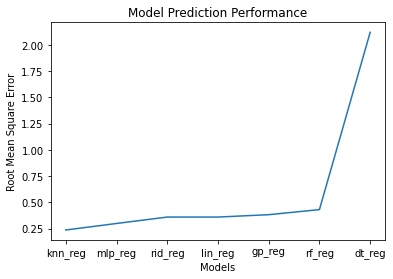

In [28]:
print("K Nearest Neighbor (n = 3):        ", knn_reg)
print("Multi-Level Perceptron Regression: ", mlp_reg)
print("Linear Regression:                 ", lin_reg)
print("Ridge Regression:                  ", rid_reg)
print("Gausian Process Regression:        ", gp_reg)
print("Random Forest Regression:          ", rf_reg)
print("Decision Tree Regression:          ", dt_reg)

# x axis values
x = ["knn_reg", "mlp_reg", "rid_reg", "lin_reg", "gp_reg", "rf_reg", "dt_reg"]
# corresponding y axis values
y = [knn_reg, mlp_reg, lin_reg, rid_reg, gp_reg, rf_reg, dt_reg]
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Models')
# naming the y axis
plt.ylabel('Root Mean Square Error')
 
# giving a title to my graph
plt.title('Model Prediction Performance')
 
# function to show the plot
plt.show()

<AxesSubplot:title={'center':'Element Over the Course of 1 Year'}, xlabel='Release Date'>

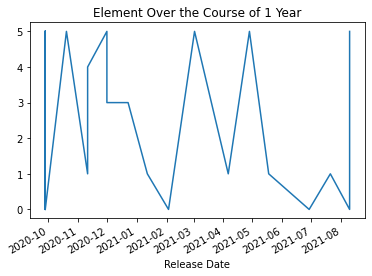

In [29]:
df.set_index('Release Date', inplace=True)
plt.title('Element Over the Course of 1 Year')
df['element_encode'].plot()

<AxesSubplot:title={'center':'Gender Over the Course of 1 Year'}, xlabel='Release Date'>

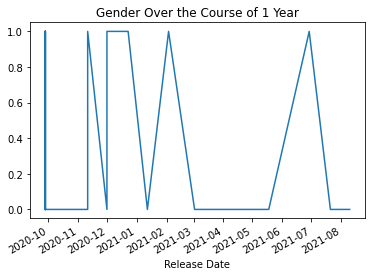

In [30]:
plt.title('Gender Over the Course of 1 Year')
df['sex_encode'].plot()

<AxesSubplot:title={'center':'Weapon Over the Course of 1 Year'}, xlabel='Release Date'>

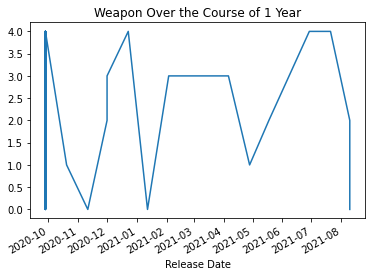

In [31]:
plt.title('Weapon Over the Course of 1 Year')
df['weapon_encode'].plot()

<AxesSubplot:title={'center':'Nation Over the Course of 1 Year'}, xlabel='Release Date'>

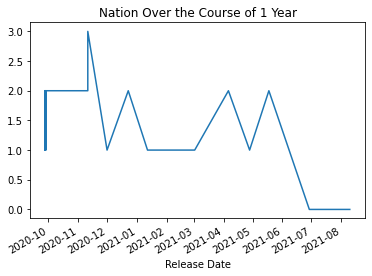

In [33]:
plt.title('Nation Over the Course of 1 Year')
df['nation_encode'].plot()